In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

In [2]:
df = gpd.read_file('./data/texas_agsuit.shp')

In [3]:
df

,NAME_1,NAME_2,mean_suit2,geometry
0,Texas,Anderson,0.507833,"POLYGON ((-95.27737 31.59311, -95.65746 31.539..."
1,Texas,Andrews,0.099667,"POLYGON ((-102.28970 32.08851, -102.79818 32.0..."
2,Texas,Angelina,0.214500,"POLYGON ((-94.55916 31.06005, -94.56059 31.061..."
3,Texas,Aransas,0.841000,"MULTIPOLYGON (((-96.95293 28.13690, -96.95264 ..."
4,Texas,Archer,0.835250,"POLYGON ((-98.42274 33.46517, -98.42251 33.394..."
...,...,...,...,...
249,Texas,Wood,0.425667,"POLYGON ((-95.59176 32.68148, -95.59190 32.688..."
250,Texas,Yoakum,0.081000,"POLYGON ((-102.59496 32.95960, -103.01449 32.9..."
251,Texas,Young,0.749750,"POLYGON ((-98.57672 32.95473, -98.95231 32.956..."
252,Texas,Zapata,0.723000,"POLYGON ((-98.95763 26.78505, -99.00964 26.675..."


# 1 A simple choropleth

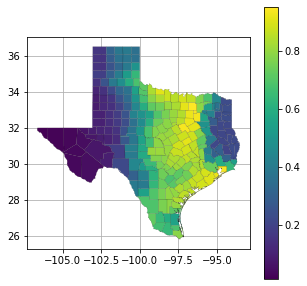

In [4]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.grid()
ax.set_axisbelow(True)
plt.show()

## 1.1 Switching off the "frame"

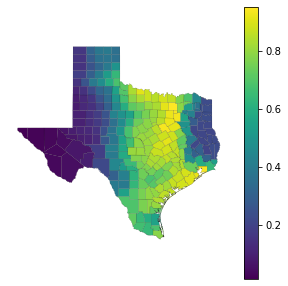

In [5]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.axis('off')
plt.show()

## 1.2 Making the plot a large as the colorbar

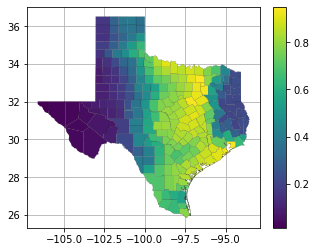

In [6]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.1)
df.plot(ax=ax, 
        cax=cax,
        column='mean_suit2',
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.grid()
ax.set_axisbelow(True)
plt.show()

# 2 Color categories

note: this requires the mapclassify package to be installed.

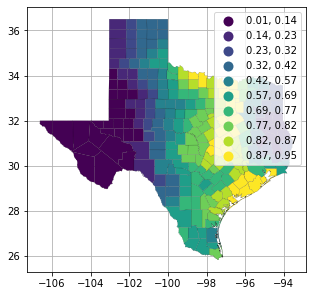

In [7]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.grid()
ax.set_axisbelow(True)
plt.show()

Note the `scheme` argument. We have used `quantiles`. This may not always be the best option. See here for alternatives:
https://geopandas.org/gallery/choropleths.html

## 2.1 Re-positioning the legend

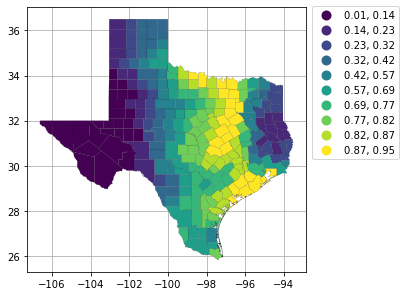

In [8]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8211, 0.2, 0.2))
plt.show()

## 2.2 Changing the legend text

In [9]:
leg.texts

[Text(0, 0, '0.01, 0.14'),
 Text(0, 0, '0.14, 0.23'),
 Text(0, 0, '0.23, 0.32'),
 Text(0, 0, '0.32, 0.42'),
 Text(0, 0, '0.42, 0.57'),
 Text(0, 0, '0.57, 0.69'),
 Text(0, 0, '0.69, 0.77'),
 Text(0, 0, '0.77, 0.82'),
 Text(0, 0, '0.82, 0.87'),
 Text(0, 0, '0.87, 0.95')]

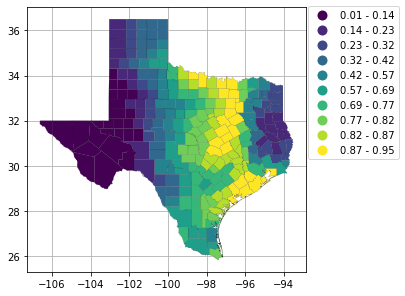

In [10]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8211, 0.2, 0.2))
for txt in leg.texts:
    txti = txt.get_text().replace(', ', ' - ')
    txt.set_text(txti)
plt.show()

# 3 Dealing with missing data

Let's artificially introduce some missing data

In [11]:
for i in range(df.shape[0]):
    if i % 10 == 0:
        df.loc[i, 'mean_suit2'] = np.nan

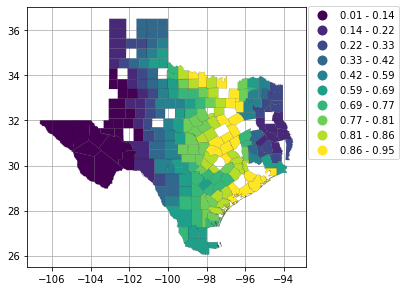

In [12]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8211, 0.2, 0.2))
for txt in leg.texts:
    txti = txt.get_text().replace(', ', ' - ')
    txt.set_text(txti)
plt.show()

The counties with missing data are also now missing their outline. We can fix this by adding a `missing_kwds` dictionary to the `plot()` call (this will also add a corresponding entry to the legend)

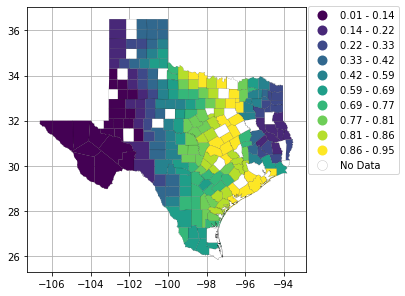

In [13]:
missing_kwds = dict(color='white', label='No Data')

f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True, 
        missing_kwds=missing_kwds)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8211, 0.2, 0.2))
for txt in leg.texts:
    txti = txt.get_text().replace(', ', ' - ')
    txt.set_text(txti)
plt.show()

We can also be fancier with our missing values:
https://geopandas.org/docs/user_guide/mapping.html#missing-data

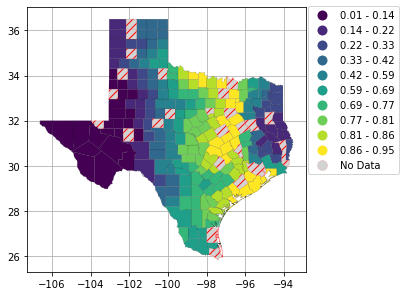

In [14]:
missing_kwds = dict(color='lightgrey',
                    edgecolor='red',
                    hatch='///',
                    label='No Data')

f, ax = plt.subplots(1,1, figsize=(5, 5))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True, 
        missing_kwds=missing_kwds)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8211, 0.2, 0.2))
for txt in leg.texts:
    txti = txt.get_text().replace(', ', ' - ')
    txt.set_text(txti)
plt.show()

# 4 Adding a base map

This follows https://geopandas.org/gallery/plotting_basemap_background.html

For this we need to `conda install contextily`

Importantly, we need to project our dataframe to Web Mercator, which is the CRS in which web tiles are typically provided. 

In [15]:
df = df.to_crs(epsg=3857)

## 4.1 Using OSM as basemap

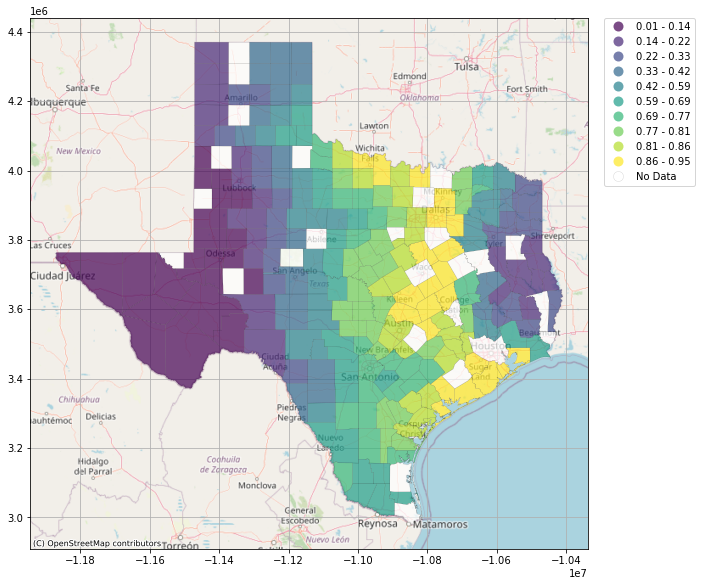

In [16]:
missing_kwds = dict(color='white', label='No Data')

f, ax = plt.subplots(1,1, figsize=(10, 10))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True, 
        missing_kwds=missing_kwds,
        alpha=0.7)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.81, 0.2, 0.2))
for txt in leg.texts:
    txti = txt.get_text().replace(', ', ' - ')
    txt.set_text(txti)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

## 4.2 Using Stamen Terrain

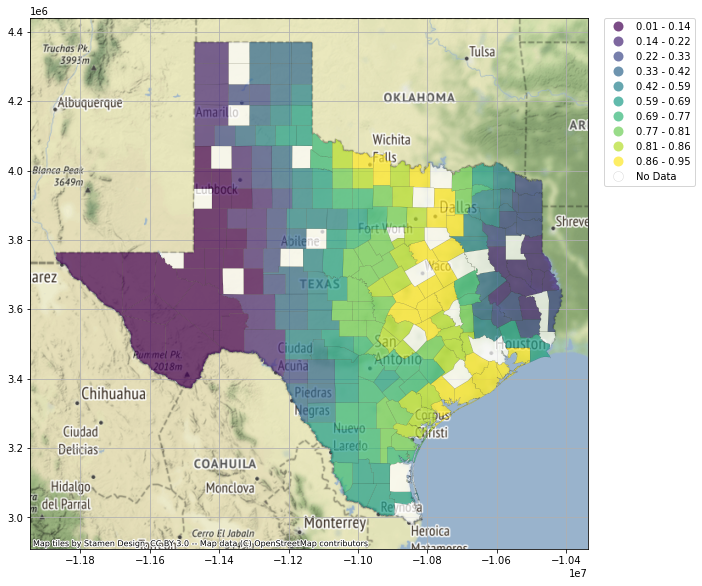

In [17]:
missing_kwds = dict(color='white', label='No Data')

f, ax = plt.subplots(1,1, figsize=(10, 10))
df.plot(ax=ax, 
        column='mean_suit2',
        scheme='quantiles',
        k=10,
        cmap='viridis', 
        edgecolor='k',
        linewidth=0.1,
        legend=True, 
        missing_kwds=missing_kwds,
        alpha=0.7)
ax.grid()
ax.set_axisbelow(True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.81, 0.2, 0.2))
for txt in leg.texts:
    txti = txt.get_text().replace(', ', ' - ')
    txt.set_text(txti)
ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain)
plt.show()